In [1]:
# plotting utility:
import matplotlib.pyplot as plt

# dataset loading through mnist
from keras.datasets import mnist

# training three classifiers : decision tree, bagging, random forest
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# model selection utitlies for trainig and test split and cross validation:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# use shuffle split cross validation for this exercise:
from sklearn.model_selection import ShuffleSplit

# make use of confusion matrix and classification report to evaluate performance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# the model is defined through pipeline utility:
from sklearn.pipeline import Pipeline

LOADING MNIST DATASET

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
# flatten each input imagte into vector of length 784
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

# normalising 
X_train = X_train/ 255
X_test = X_test/255

In [8]:
X_train.shape

(60000, 784)

In [9]:
X_test.shape

(10000, 784)

In [10]:
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)

1. `train classifiers` contain a common code for training classifier for MNIST multiclass classification

  1. it takes `estimator`, feature matirx, labels , cross validation strategy, and name of the classifier as input

  2. It first fits estimator with feature matrix and labels

  3. It obtains cross validated `f1_macro` for trainig set with 10 fold shuffle split cross validation and prints it

In [12]:
def train_classifiers(estimator, X_train, y_train, cv, name):
  estimator.fit(X_train, y_train)
  cv_train_score = cross_val_score(estimator,
                                   X_train, 
                                   y_train,
                                   cv = cv, 
                                   scoring = 'f1_macro')

  print(f"on an avearage {name} has f1 score of :")
  print(f"{cv_train_score.mean():.3f} +/- {cv_train_score.std():.3f} on training set" )

2. `eval` function takes estimator, test feature matrix, labels as input and produce classification report and confusion matrix
  1. It first predicts the labels for the test set
  2. Then it uses these predicted reports for calculating various evaluation metrics like precision, recall, f1_score and accuracy for each of the 10 classes
  3. it also obtains a confusion matrix by comparing these predictions with the actual label and display it with ConfusionMatrixDispaly utility
  

In [17]:
def eval(estimator, X_test, y_test):
  y_pred = estimator.predict(X_test)

  print('# classification report: ')
  print(classification_report(y_test, y_pred))

  print('# confusion matrix')
  disp = ConfusionMatrixDisplay(
      confusion_matrix = confusion_matrix(y_test, y_pred)
  )

  disp.plot()
  plt.title('Confusion Matrix')
  plt.show()
  

Lets train three classifiers with these functions:

1. Decision Tree 

2. Bagging Classifier - which uses decision tree as default classifier and trains multiple decision tree classifiers on different bags obtained through bootstrap sampling of the training set.

3. Random Forest Classifier

# DECISION TREE FOR MNIST Multiclass CLASSIFIER

In [18]:
decision_tree_pipeline = Pipeline([('classifier', DecisionTreeClassifier())])
train_classifiers(decision_tree_pipeline, X_train, y_train.ravel(), cv, "decision tree")

on an avearage decision tree has f1 score of :
0.867 +/- 0.004 on training set


# classification report: 
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.95      0.97      0.96      1135
           2       0.87      0.85      0.86      1032
           3       0.83      0.86      0.84      1010
           4       0.87      0.88      0.88       982
           5       0.84      0.84      0.84       892
           6       0.89      0.89      0.89       958
           7       0.91      0.90      0.90      1028
           8       0.82      0.80      0.81       974
           9       0.86      0.84      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

# confusion matrix


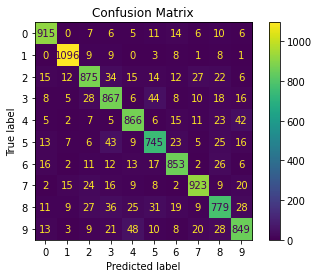

In [19]:
eval(decision_tree_pipeline, X_test, y_test)

# MNIST Classification with Bagging

In [20]:
# bagging pipeline

bagging_pipeline = Pipeline([('classifier', BaggingClassifier())])
train_classifiers(bagging_pipeline, X_train, y_train.ravel(), cv, 'bagging')

on an avearage bagging has f1 score of :
0.937 +/- 0.004 on training set


# classification report: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.92      0.94      0.93      1032
           3       0.94      0.93      0.93      1010
           4       0.93      0.94      0.94       982
           5       0.92      0.91      0.91       892
           6       0.97      0.95      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.93      0.90      0.92       974
           9       0.93      0.93      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

# confusion matrix


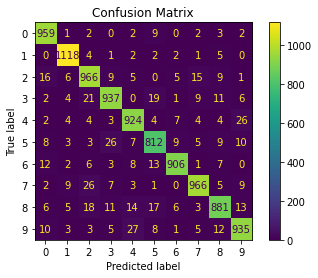

In [21]:
eval(bagging_pipeline, X_test, y_test)

# Random Forest classifier for MNIST muilticlass classification

In [22]:
random_forest_pipeline = Pipeline([('classifier', RandomForestClassifier())])
train_classifiers(random_forest_pipeline, X_train, y_train.ravel(), cv, 'rf')

on an avearage rf has f1 score of :
0.967 +/- 0.001 on training set


# classification report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.95      0.96      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

# confusion matrix


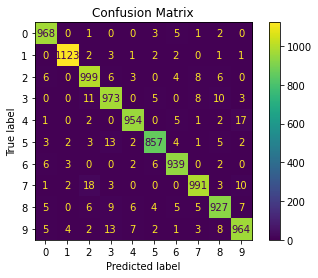

In [23]:
eval(random_forest_pipeline, X_test, y_test)